In [3]:
from mnist import MNIST

mndata = MNIST('./datasets/mnist')

images, labels = mndata.load_training()
# or
images_test, labels_test = mndata.load_testing()

In [12]:
import numpy as np 

imgs = np.array(images)
imgs = imgs.reshape((-1,28,28,1))

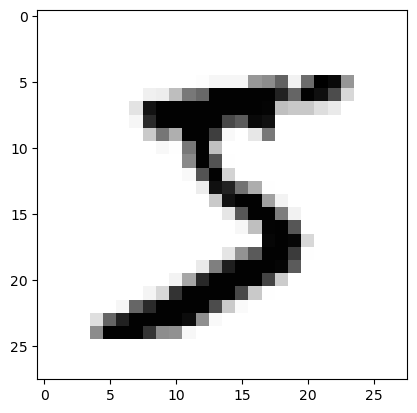

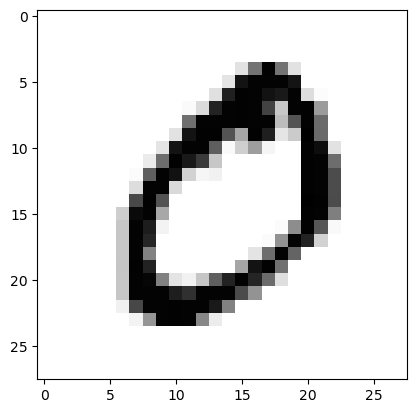

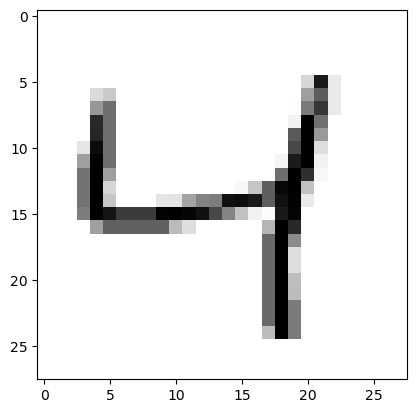

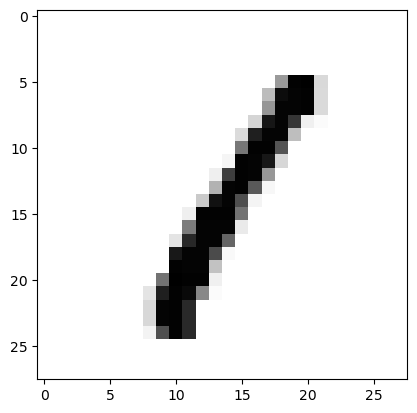

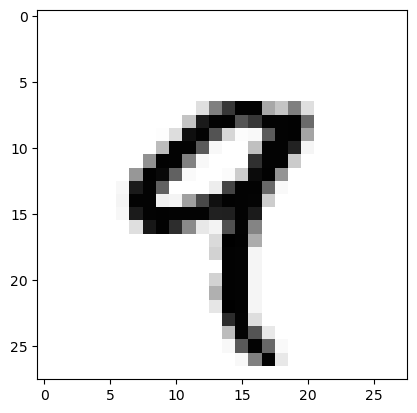

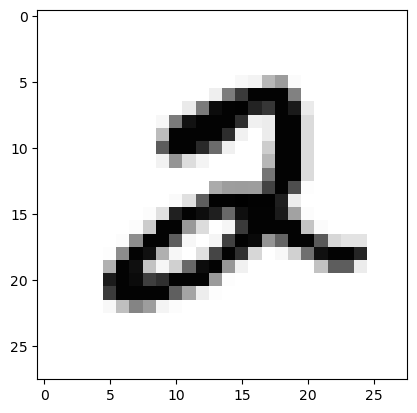

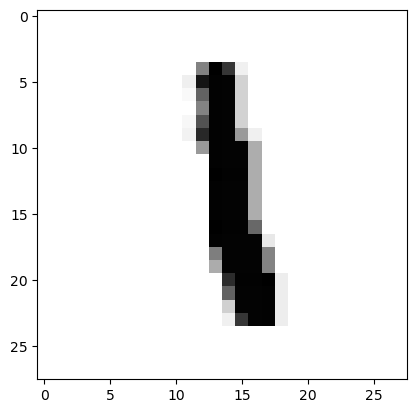

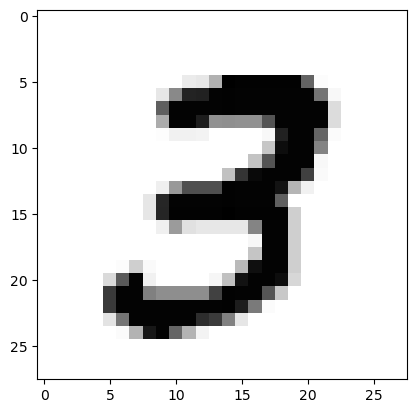

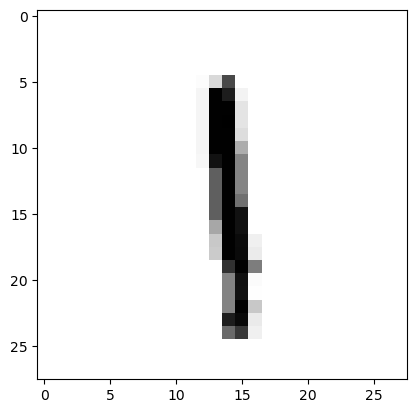

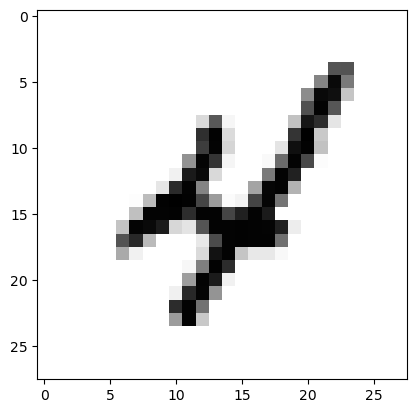

In [20]:
import matplotlib.pyplot as plt

for i in range(10):
    img = imgs[i].reshape((28,28)) / 255
    plt.imshow(img,  cmap="Greys")
    plt.show()

In [27]:
import tensorflow_datasets as tfds
import tensorflow as tf
ds = tfds.load('mnist', split='train', shuffle_files=True)
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)

In [48]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label 
batch_size = 128

In [49]:
    (ds_train, ds_test), ds_info = tfds.load(
        'mnist',
        split=['train', 'test'],
        shuffle_files=True,
        as_supervised=True,
        with_info=True, 
    )
    # train data preparation 
    ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
    ds_train = ds_train.cache()
    ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
    ds_train = ds_train.batch(batch_size)
    ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

    # test data preparation 
    ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
    ds_test = ds_test.batch(batch_size)
    ds_test = ds_test.cache()
    ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [53]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
X = np.concatenate([x_train, x_test], axis = 0)
X = np.expand_dims(X,-1).astype('float32') / 255

In [54]:
X.shape

(70000, 28, 28, 1)